In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt
import scipy.stats as stats
print('Khai báo thư viện thành công')

Khai báo thư viện thành công


In [3]:
dat4 = pd.read_csv('data/advertising.csv')
dat4

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


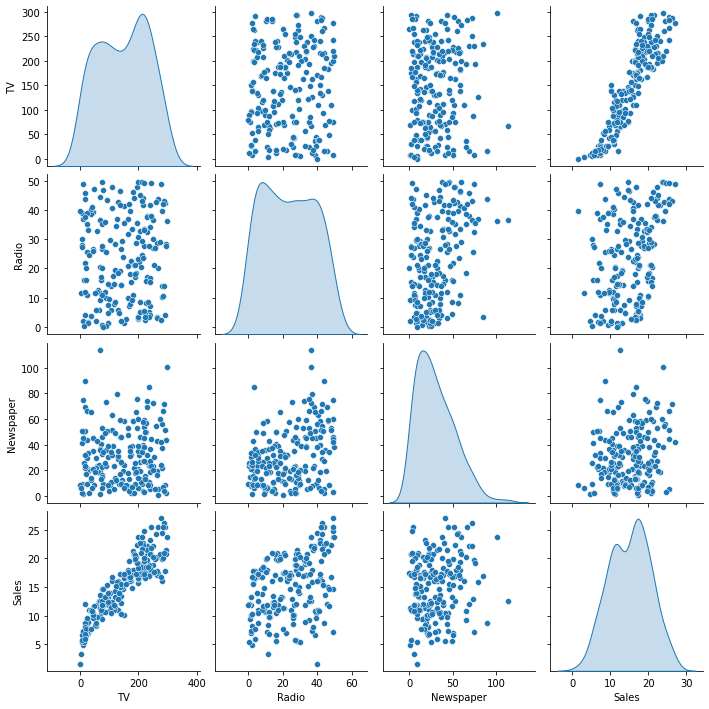

In [8]:
sns.pairplot(data = dat4, diag_kind = 'kde');

In [10]:
stats.pearsonr(dat4.Sales, dat4.TV)

PearsonRResult(statistic=0.9012079133023309, pvalue=7.927911625320818e-74)

In [11]:
stats.pearsonr(dat4.Sales, dat4.Radio)

PearsonRResult(statistic=0.34963109700766926, pvalue=3.882892364494171e-07)

In [12]:
stats.pearsonr(dat4.Sales, dat4.Newspaper)

PearsonRResult(statistic=0.1579600261549263, pvalue=0.025487444306997908)

Kết luận: Có thể dự đoán doanh thu (Sales) dựa trên chi phí quảng cáo trên TV

In [13]:
learn = dat4.loc[:150,:]
test = dat4.loc[151:,:]
learn.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         151 non-null    float64
 1   Radio      151 non-null    float64
 2   Newspaper  151 non-null    float64
 3   Sales      151 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 151 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         49 non-null     float64
 1   Radio      49 non-null     float64
 2   Newspaper  49 non-null     float64
 3   Sales      49 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [21]:
import sklearn.model_selection as ms
learn2, test2 = ms.train_test_split(dat4, test_size = 0.25)
learn2.info()
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 24 to 171
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         150 non-null    float64
 1   Radio      150 non-null    float64
 2   Newspaper  150 non-null    float64
 3   Sales      150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 66 to 159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         50 non-null     float64
 1   Radio      50 non-null     float64
 2   Newspaper  50 non-null     float64
 3   Sales      50 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [22]:
reg2 = lm.LinearRegression()
X = np.asarray(learn2.loc[:,'TV'])
Y = np.asarray(learn2.loc[:,'Sales'])
reg2.fit(X.reshape(-1,1),Y)

LinearRegression()

In [23]:
Y_ = reg2.intercept_ + reg2.coef_*X
# tính thủ công

In [ ]:
Y_ = reg2.predict(X.reshape(-1,1))
# tính bằng thư viện

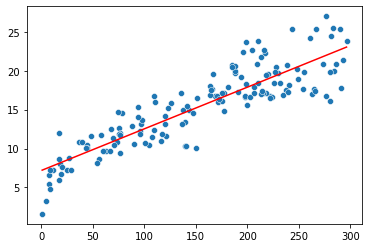

In [26]:
sns.scatterplot(x=X,y=Y)
sns.lineplot(x=X,y=Y_, color = 'r')
plt.show()

In [ ]:
# Tính toán điểm r2score, so sánh giữa dữ liệu dự đoán và dữ liệu thực

In [28]:
import sklearn.metrics as metrics
y_pred = reg2.predict(np.array(test2.TV).reshape(-1,1))
metrics.r2_score(test2.Sales,y_pred)

0.8822298226097729

Kết luận là: Tương đối chuẩn

# HỒI QUY TUYẾN TÍNH BẬC CAO

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression as lr
import seaborn as sns
print('Khai báo thư viện thành công')

Khai báo thư viện thành công


In [32]:
#Nhập dữ liệu
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

In [38]:
y = np.array(y)

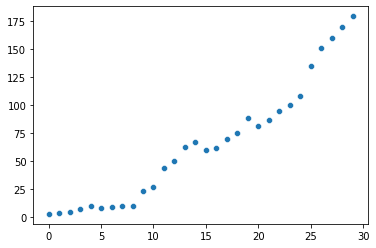

In [33]:
sns.scatterplot(x=x, y=y);

In [34]:
poly = pf(degree=2)
poly_X = poly.fit_transform(x.reshape(-1, 1))
poly_X

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  20., 400.],
       [  1.,  21., 441.],
       [  1.,  22., 484.],
       [  1.,  23., 529.],
       [  1.,  24., 576.],
       [  1.,  25., 625.],
       [  1.,  26., 676.],
       [  1.,  27., 729.],
       [  1.,  28., 784.],
       [  1.,  29., 841.]])

In [40]:
pr_model = lr()
pr_model.fit(poly_X, y)

LinearRegression()

In [41]:
y_pred = pr_model.predict(poly_X)
y_pred

array([  1.70806452,   3.04187987,   4.70292388,   6.69119657,
         9.00669792,  11.64942794,  14.61938662,  17.91657397,
        21.54098999,  25.49263467,  29.77150802,  34.37761004,
        39.31094073,  44.57150008,  50.1592881 ,  56.07430478,
        62.31655014,  68.88602415,  75.78272684,  83.00665819,
        90.55781821,  98.4362069 , 106.64182425, 115.17467027,
       124.03474495, 133.22204831, 142.73658033, 152.57834101,
       162.74733037, 173.24354839])

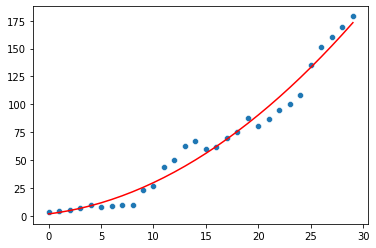

In [42]:
sns.scatterplot(x=x,y=y);
sns.lineplot(x=x,y=y_pred,color = 'r');

In [43]:
metrics.r2_score(y,y_pred)

0.9742355121173141

In [45]:
x1 = 30
x1 = np.array(x1)
polyx1 = poly.fit_transform(x1.reshape(-1,1))
y1 = pr_model.predict(polyx1)
print(y1)

[184.06699507]


# SỬ DỤNG PIPELINE

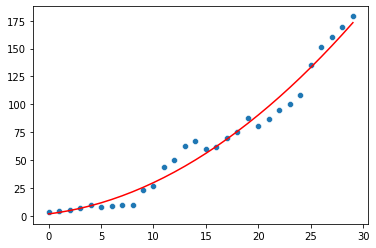

In [46]:
from sklearn.pipeline import Pipeline
poly = pf(degree = 2)
pr_model = lr()
pipeline = Pipeline([('polynomial_features',poly), ('linear_regression',pr_model)])
pipeline.fit(x.reshape(-1,1),y)
Y_pred = pipeline.predict(x.reshape(-1,1))
sns.scatterplot(x=x,y=y)
sns.lineplot(x=x,y=y_pred,color='r')
plt.show()

In [47]:
x2 = 30
y2 = pipeline.predict(np.array(x2).reshape(-1,1))
print(y2)

[184.06699507]


# HỒI QUY TUYẾN TÍNH ĐA BIẾN

In [48]:
area = [2100,1416,1534,852,1600,1985,1535,1050,2300,1200]
bedroom = [5,3,3,2,3,5,4,2,4,3]
floor = [1,2,2,1,2,1,2,1,2,2]
price = [460,232,315,178,329,420,330,195,450,250]

In [49]:
Y = np.asarray(price)
X = np.append(np.array(area).reshape(-1,1),np.array(bedroom).reshape(-1,1), axis = 1)
X = np.append(X, np.array(floor).reshape(-1,1), axis = 1)
X

array([[2100,    5,    1],
       [1416,    3,    2],
       [1534,    3,    2],
       [ 852,    2,    1],
       [1600,    3,    2],
       [1985,    5,    1],
       [1535,    4,    2],
       [1050,    2,    1],
       [2300,    4,    2],
       [1200,    3,    2]])

In [52]:
demo6_model = lr(normalize = True) # Tạo object hồi quy tuyến tính có chuẩn hóa
demo6_model.fit(X,Y)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

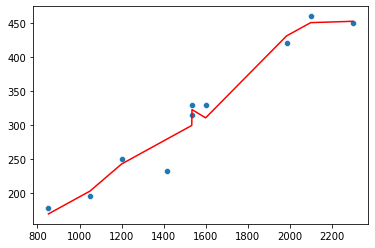

In [54]:
#Sử dụng pipeline (kiểu mới)
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler(with_mean=False)
demo6_model = lr()
#Tạo pipeline
pipeline = Pipeline([("StandardScaler", zscore),("linear_regression", demo6_model)])
pipeline.fit(X,Y)
Y_ = pipeline.predict(X)
#Vẽ
sns.scatterplot(x=X[:,0], y=Y);
sns.lineplot(x=X[:,0], y=Y_, color='r');

In [56]:
metrics.r2_score(Y,Y_)

0.9653877508338672

## THỰC HÀNH VỚI DỮ LIỆU INSURANCE

In [1]:
import pandas as pd
dat7 = pd.read_csv('data/insurance.csv')
dat7

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


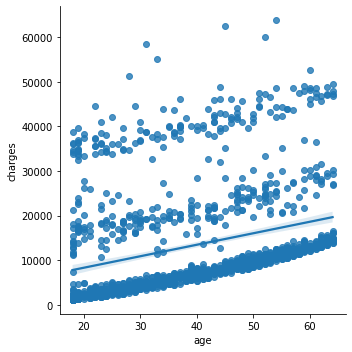

In [2]:
import seaborn as sns
sns.lmplot(data = dat7, x = 'age', y = 'charges');

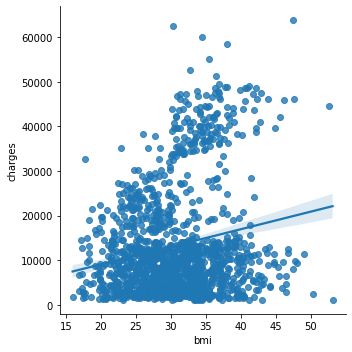

In [59]:
sns.lmplot(data = dat7, x = 'bmi', y = 'charges');

In [3]:
dat7a = pd.get_dummies(dat7)
dat7a

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
dat7a = dat7a.drop(columns = ['sex_male','smoker_no'])
dat7a

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1


In [5]:
import sklearn.model_selection as model_selection
train,test = model_selection.train_test_split(dat7a,train_size = 0.6)
train

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
649,58,32.965,0,12430.95335,1,0,1,0,0,0
1207,36,33.400,2,38415.47400,0,1,0,0,0,1
842,23,32.780,2,36021.01120,1,1,0,0,1,0
1109,45,20.350,3,8605.36150,0,0,0,0,1,0
522,51,33.915,0,9866.30485,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
955,31,39.490,1,3875.73410,0,0,0,0,1,0
73,58,32.010,1,11946.62590,0,0,0,0,1,0
491,61,25.080,0,24513.09126,1,0,0,0,1,0
669,40,29.810,1,6500.23590,1,0,0,0,1,0


In [6]:
test

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1031,55,35.200,0,44423.80300,1,1,0,0,1,0
503,19,30.250,0,32548.34050,0,1,0,0,1,0
744,50,26.410,0,8827.20990,0,0,0,1,0,0
294,25,26.800,3,3906.12700,0,0,0,0,0,1
638,39,26.410,0,20149.32290,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,51,20.600,0,9264.79700,1,0,0,0,0,1
844,53,30.495,0,10072.05505,0,0,1,0,0,0
1163,18,28.215,0,2200.83085,1,0,1,0,0,0
402,64,32.965,0,14692.66935,1,0,0,1,0,0


In [7]:
X = train.drop(columns = 'charges')
Y = train.loc[:,'charges']

In [8]:
X

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
649,58,32.965,0,1,0,1,0,0,0
1207,36,33.400,2,0,1,0,0,0,1
842,23,32.780,2,1,1,0,0,1,0
1109,45,20.350,3,0,0,0,0,1,0
522,51,33.915,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
955,31,39.490,1,0,0,0,0,1,0
73,58,32.010,1,0,0,0,0,1,0
491,61,25.080,0,1,0,0,0,1,0
669,40,29.810,1,1,0,0,0,1,0


In [9]:
Y

649     12430.95335
1207    38415.47400
842     36021.01120
1109     8605.36150
522      9866.30485
           ...     
955      3875.73410
73      11946.62590
491     24513.09126
669      6500.23590
616     11658.11505
Name: charges, Length: 802, dtype: float64

In [13]:
#Sử dụng pipeline (kiểu mới)
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler(with_mean=False)

from sklearn.linear_model import LinearRegression as lr
demo7_model = lr()

#Tạo pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ('StandardScaler', zscore),
        ('linear_regression',demo7_model)
    ])
pipeline.fit(X,Y)
Y_ = pipeline.predict(test.drop(columns=['charges']))

import sklearn.metrics as metrics
metrics.r2_score(test.loc[:,'charges'],Y_)

0.7487573282850581